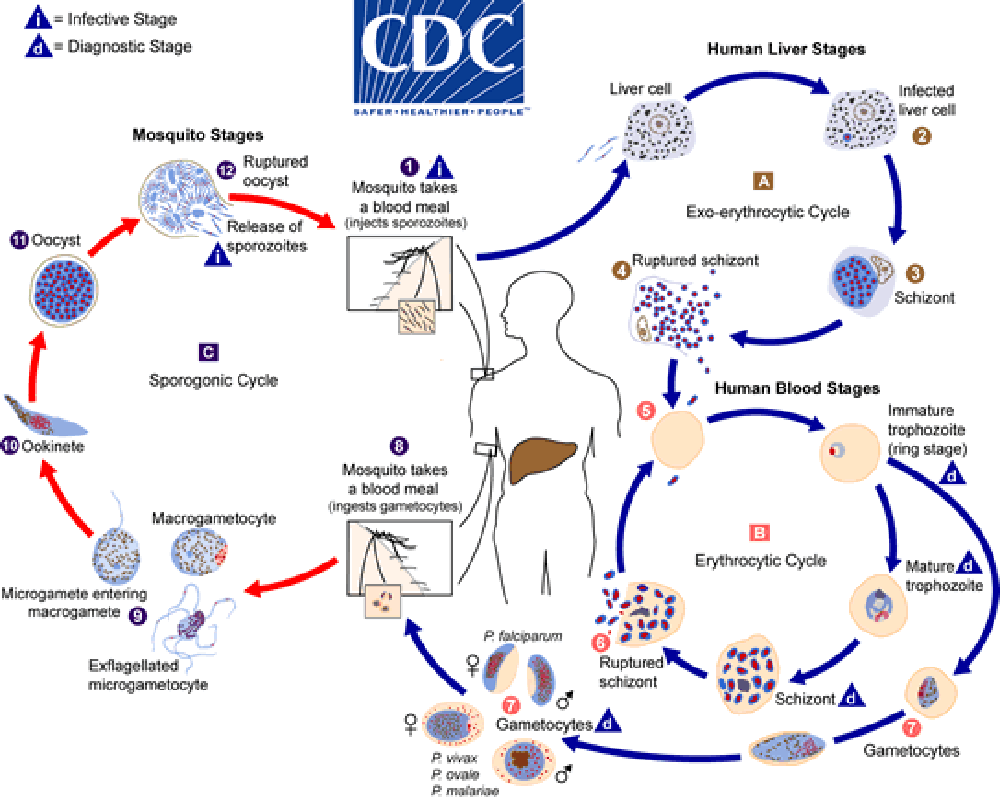

# <font color="red"> Malaria (Sıtma):
* Dişi anofel cinsi sivrisineğin ısırması ile insana bulaşan, plazmodium türü protozoonlar tarafından meydana getirilen ve nöbet şeklinde rekurrent ateş yükselmesi ile kendini gösteren bir infeksiyon hastalığıdır.

* Dişi anofel cinsi sivrisineğin insanı ısırması ile **sporozoid**ler dolaşıma karışarak karaciğere ulaşır, sporozoidler **merozoid**lere dönüşür ve dönüşüm sonunda(10-14 gün) tekrar kan dolaşımına girerek eritrositlere geçer ve burada çoğalmaya başlar. Bu aşamada parazitler **trofozoit** ya da **shizont** olarak adlandırılır. Shizontlar eritrositleri parçalayarak serbest kalır ve çevredeki eritrositlere bulaşır.

* Bu döngü devam ederken bazı merozidler parazitin erkek ve dişi formlarına dönüşerek gametositleri oluşturur. Anofel cinsi dişi sivrisinek tarafından çekilen kanın içinde salınan gametositlerin erkek ve dişi gametleri birleşerek zigot oluşur. Zigotlar sivrisinekte sporozoidlere dönüşür ve bu döngü tekrarlanır

# <font color="red"> Image Classification with CNN for Malaria Data

## <font color="blue"> Preparing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy
import random as r
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import keras
import cv2
import matplotlib.pyplot as plt


In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [ ]:
yol="/content/cell_images"
parasitized_path=os.path.join(yol,"Parasitized")
uninfected_path=os.path.join(yol,"Uninfected")

parasitized_files=glob.glob(parasitized_path+"/*png")
uninfected_files=glob.glob(uninfected_path+"/*png")


In [ ]:
uninfected_files[1]

'/content/cell_images/Uninfected/C73P34_ThinF_IMG_20150815_112246_cell_76.png'

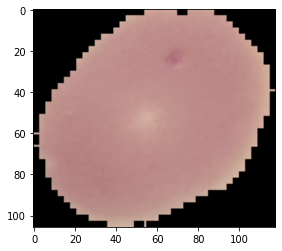

In [ ]:
from skimage.io import imread
import numpy as np

#örnek bir resmin yolu
ornek=uninfected_files[1]

#resmi oku ve numpy dizisine dönüştür
img=imread(ornek)

#resmi görüntüleme
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(106, 118, 3)

In [ ]:
len(parasitized_files)

13779

In [ ]:
len(uninfected_files)

13779

In [ ]:
f=uninfected_files+parasitized_files

In [ ]:
f[1]

'/content/cell_images/Uninfected/C73P34_ThinF_IMG_20150815_112246_cell_76.png'

In [ ]:
len(f)

27558

In [ ]:
f[45]

'/content/cell_images/Uninfected/C141P102ThinF_IMG_20151005_214338_cell_44.png'

(124, 127, 3)

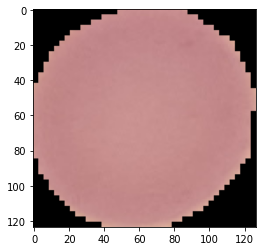

In [ ]:
img2=imread(f[45])

plt.imshow(img2)

img2.shape

## <font color="blue"> visualization of infected and parasitized

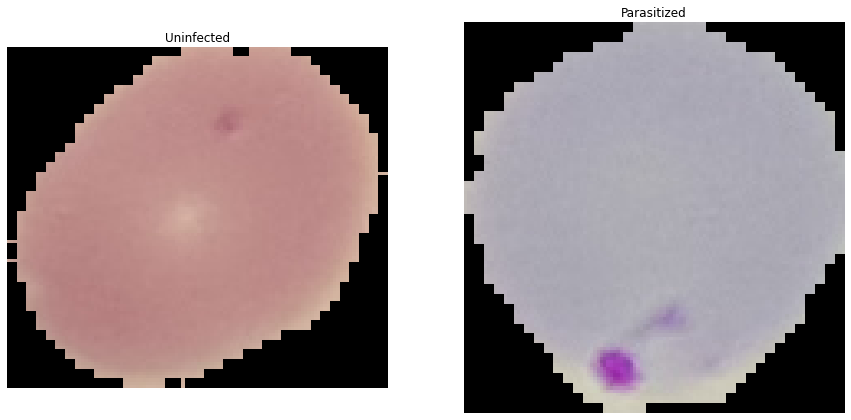

In [ ]:
img_uninfected=imread(f[1])
img_para=imread(f[15002])
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)#1satır 2sütün 1.görsel
plt.title("Uninfected")
plt.axis("off")
plt.imshow(img_uninfected)


plt.subplot(1,2,2)##1satır 2sütün 2.görsel
plt.title("Parasitized")
plt.axis("off")
plt.imshow(img_para)

## <font color="blue"> Dividing Dataset

Derin öğrenme modelleri, genellikle giriş verilerinin ölçeklendirilmesi, normalleştirilmesi ve bazen de boyutlandırılması gerektiği için resimleri uygun şekilde işlememiz gerekiyor. Bunun için bir dizi adımı takip etmemiz gerekiyor:



1.   Resimleri yükle ve boyutlarını kontrol et
2.   Resimleri ölçeklendir ve normalleştir
3.   Resimleri dizi formatına dönüştürün






Bu işlemleri gerçekleştirebilmek için genellikle önceden tanımlanmış işlemci işlevleri kullanılır. **Keras'ın ImageDataFenerato**r sınıfı bu işlemi kolaylaştırır

ilk olarak resimleri önceden işlemek için **ImageDataGenerator** sınıfını kullanarak bir veri artırma nesnesi oluşturacağız. Bu nesne, veri yolu içindeki tüm resimleri alacak ve bunları önceden belirlenmiş boyutlara yeniden boyutlandıracak, ölçeklendirecek, normalleştirecek ve daha sonra eğitim veya doğrulama için kullanılacak olan belirli bir yığın boyutunda döndürecektir.

Öncelikle ImageDataGenerator sınıfını kullanarak veri yolu içindeki tüm resimleri yükleyeceğiz. Bu işlem resimleri önceden belirlenmiş boyutlara yeniden boyutlandıracak ve ölçeklendirecektir

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


#veri artırma nesnesi oluştur
datagen=ImageDataGenerator(rescale=1./255)

#veri yolu: 
train_path="/content/cell_images"

train_generator=datagen.flow_from_directory(train_path, target_size=(128,128),
                                            batch_size=32,class_mode="binary")



Found 27558 images belonging to 2 classes.


**rescale** parametresi; resimlerin ölçeklendirilmesi için kullanılır

**flow_from_directory()**, belirtilen klasördeki tüm resimleri yükleyecek ve belirtilen boyutlara yeniden boyutlandıracaktır.

**target_size**, yeniden boyutlandırılan resimlerin hedef boyutlarını belirtir.

**batch_size** her yığında kaç resim yükleneceğini belirtir

**class_mode**, veri kümesinin sınıflandırma veya regresyon problemi olduğunu belirtir





In [ ]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

#veri yolu
train_path = "/content/cell_images"


trainDatagen = datagen.flow_from_directory(directory=train_path,
                                           target_size=(128,128),
                                           class_mode="binary",
                                           batch_size=16,
                                           subset="training")

valDatagen=datagen.flow_from_directory(directory=train_path,
                                       target_size=(128,128),
                                       class_mode="binary",
                                       batch_size=16,
                                       subset="validation")

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


## <font color="purple"> Preparing the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

**Dropout()**, eğitim sırasında overfitting'i önlemek için kullanılır. 0.2 kadar nöron devre dışı bırakılarak ağı daha az bağımlı hale getirir. BU sayede ağın farklı özelliklerini öğrenmesi ve daha genişletilebilir hale gelmesini sağlar

**Flatten()**, bir girdi tensörünü düzleştirmek için kullanılır. Bu tensörün şeklini (batch_size,dim_1, dim_2,...,dim_n) olarak temsil edilen çok boyutlu bir tensörden (batch_size,dim_1*dim_2*...0dim_n) olarak temsil ed,len düz bir tensöre dönüştürür.

Bir resim sınıflandırma modelinde Flatten() fonksiyonu son konvolüsyonel katmanın çıkışını bir düz tensöre olarak yeniden şekillendirebilir ve ardından tam bağlantılı katmana aktarabilir. BU, her bir resmi bir dizi sayı olarak temsil etmek için kullanışlıdır

**"model.add(Conv2D(16,(3,3),activation="relu",input_shape=(128,128,3)))"** kodu, bir sinir ağı modelinde 2D evrişim katmanı eklemek için kullanılır. Bu katman, resim verilerinin özelliklerini çıkarmak için kullanılır.

Bu kodda "16" adet filtre kullanılarak 3x3 boyutlarında bir evrişim(convolution) yapılır.
activation="relu" parametresi ile aktivasyon fonksiyonu olarak RelU(Rectified Linear Unit) fonksiyonu kullanılır. 
input_shape=(128,128,3) ise girdi verisinin şeklini ifade eder. Bu örnekte girdi resimleri 128x128 piksel boyutunda ve 3 renk kanalına sahip (RGB) resimlerdir 

**Convolution(evrişim)**, matematiksel işlemlerle bir sinyal veya veri kümesi üzerinde kayan bir pencere(kernel) ile işlem yaparak çıktı üreten bir işlem olarak tanımlanabilir. Bu işlem, görüntü işleme ve işaretleme gibi alanlarda yaygın olarak kullanılmaktadır.

Özellikle görüntü işlemede, evrişim işlemi, görüntü üzerindeki farklı özellikleri(öreneğin kenarlar,köşeler vb.) vurgulamak için kullanılır. Bu işlem, bir görüntü üzerinde kayan bir pencere ile işlem yaparak, her bölge için bir çıktı değeri üretir. Bu çıktılar, sonraki katmanlarda kullanılmak üzere bir özellik haritası oluşturur

**MaxPooling** katmanı, özellik haritasnı önceki katmandan aldığı girdi üzerinde kaydırarak, özellik haritasının boyutunu küçültür. Bu işlem sırasında girdi olarak alınan her bir blok içerisidneki en büyük değer diğerlerine oranlanarak çıkış olarak verilir.

**MaxPool2D** katmanı, bu işlemi iki boyutlu girdiler için yapar. "2x2" boyutundaki bir pencereyi "2x2" adımlarla özellik haritası üzerinde kaydırır ve her pencere içindeki en büyük değeri çıkış olarak verir. Bu işlem boyutu yarıya indirilmiş bir özellik haritası üretir. Bu, ağın daha yüksek seviyeli özellikleri öğrenmesini sağlar ve aşırı uyuma karşı direnci arttırır

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history=model.fit_generator(generator=trainDatagen,
                            validation_data=valDatagen,
                            epochs=20)

Epoch 1/20


<ipython-input-23-5e08e4d893ff>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=trainDatagen,


1378/1378 [==============================] - 55s 32ms/step - loss: 0.2842 - accuracy: 0.8811 - val_loss: 0.2118 - val_accuracy: 0.9309
Epoch 2/20
1378/1378 [==============================] - 43s 31ms/step - loss: 0.1669 - accuracy: 0.9498 - val_loss: 0.1737 - val_accuracy: 0.9414
Epoch 3/20
1378/1378 [==============================] - 43s 31ms/step - loss: 0.1595 - accuracy: 0.9526 - val_loss: 0.2074 - val_accuracy: 0.9347
Epoch 4/20
1378/1378 [==============================] - 43s 31ms/step - loss: 0.1542 - accuracy: 0.9555 - val_loss: 0.2217 - val_accuracy: 0.9298
Epoch 5/20
1378/1378 [==============================] - 43s 31ms/step - loss: 0.1523 - accuracy: 0.9552 - val_loss: 0.1790 - val_accuracy: 0.9414
Epoch 6/20
1378/1378 [==============================] - 43s 31ms/step - loss: 0.1445 - accuracy: 0.9561 - val_loss: 0.1641 - val_accuracy: 0.9452
Epoch 7/20
1378/1378 [==============================] - 43s 31ms/step - loss: 0.1411 - accuracy: 0.9569 - val_loss: 0.1786 - val_accura

In [ ]:
model.evaluate(valDatagen) #modelin performansını ölçüyoruz

345/345 [==============================] - 7s 20ms/step - loss: 0.1850 - accuracy: 0.9419


[0.1849990338087082, 0.9419237971305847]

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)

In [ ]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.284169,0.881123,0.211754,0.930853
1,0.166877,0.949837,0.173660,0.941379
2,0.159464,0.952558,0.207407,0.934664
3,0.154181,0.955461,0.221666,0.929764
4,0.152313,0.955234,0.179014,0.941379
5,0.144462,0.956050,0.164139,0.945191
6,0.141117,0.956867,0.178599,0.941016
7,0.139920,0.957094,0.198040,0.937205
8,0.137657,0.956776,0.195334,0.936298
9,0.135529,0.959634,0.217065,0.931397


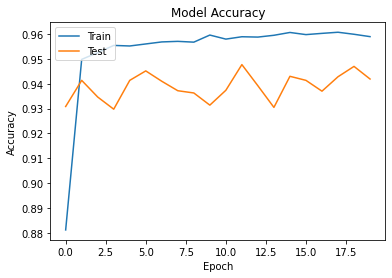

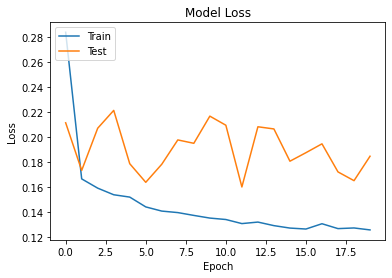

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [ ]:
model.save("malaria_diagnosis.h5")

## <font color ="purple"> Prediction

In [ ]:
f[1]

'/content/cell_images/Uninfected/C73P34_ThinF_IMG_20150815_112246_cell_76.png'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path ="/content/cell_images/Uninfected/C73P34_ThinF_IMG_20150815_112246_cell_76.png"

img=load_img(image_path,target_size=(128,128))
img_array=img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)

model_malaria = tf.keras.models.load_model("/content/malaria_diagnosis.h5")

prediction = model_malaria(img_array)

print(prediction)

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


In [ ]:
f[15325]

'/content/cell_images/Parasitized/C97P58ThinF_IMG_20150917_152225_cell_7.png'

In [ ]:
im=f[15324]

img=load_img(im,target_size=(128,128))
img_array=img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)

model_malaria = tf.keras.models.load_model("/content/malaria_diagnosis.h5")

prediction = model_malaria(img_array)

print(prediction)

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
